In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [91]:
df = pd.read_csv('datasets/ramen-ratings.csv')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [92]:
df.sample(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2139,441,Ottogi,Spice Seafood,Pack,South Korea,3.75,NaN
516,2064,Nongshim,Arrabiata Rice Bucatini,Pack,USA,5,NaN
1235,1345,Lotus Foods,Forbidden Rice Ramen,Pack,USA,2.25,NaN
2568,12,Sapporo Ichiban,Shrimp Flavor,Pack,Japan,2.5,NaN
1739,841,Nongshim,Chapagetti (South Korean),Pack,South Korea,4,NaN
107,2473,Tokyo Noodle,Mini Instant Noodle Mild Curry Flavor,Pack,Japan,2,NaN
1248,1332,Sakura Noodle,Chikara Brand Udon Chicken Flavor,Pack,USA,3.75,NaN
1139,1441,Nissin,Souper Meal Chili Picante Chicken With Lime Fl...,Bowl,USA,3.5,NaN
2474,106,GreeNoodle,Tom Yum,Pack,Thailand,0.5,NaN
1246,1334,Sakura Noodle,Chikara Brand Udon Mushroom Flavor,Pack,USA,3.75,NaN


In [93]:
df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [94]:
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [95]:
rated_only = df[df.Stars != 'Unrated']
rated_only['Stars'] = pd.to_numeric(rated_only['Stars'])

C:\Users\dmard\AppData\Local\Temp\ipykernel_21456\4108263203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_only['Stars'] = pd.to_numeric(rated_only['Stars'])


In [96]:
print(f'''
Con pandas

Cuartil 1: {rated_only.Stars.quantile(0.25)}
Cuartil 2: {rated_only.Stars.quantile(0.5)}
Cuartil 3: {rated_only.Stars.quantile(0.75)}
''')


Con pandas

Cuartil 1: 3.25
Cuartil 2: 3.75
Cuartil 3: 4.25



In [97]:
print(f'''
Con numpy

Cuartil 1: {np.quantile(rated_only.Stars, 0.25)}
Cuartil 2: {np.quantile(rated_only.Stars, 0.5)}
Cuartil 3: {np.quantile(rated_only.Stars, 0.75)}
''')


Con numpy

Cuartil 1: 3.25
Cuartil 2: 3.75
Cuartil 3: 4.25



In [98]:
iqr = np.quantile(rated_only.Stars, 0.75) - np.quantile(rated_only.Stars, 0.25)
iqr

1.0

In [99]:
iqr = np.quantile(rated_only.Stars, 0.75) - np.quantile(rated_only.Stars, 0.25,)
iqr

1.0

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Cup'),
  Text(1, 0, 'Pack'),
  Text(2, 0, 'Tray'),
  Text(3, 0, 'Bowl'),
  Text(4, 0, 'Box'),
  Text(5, 0, 'Can'),
  Text(6, 0, 'Bar')])

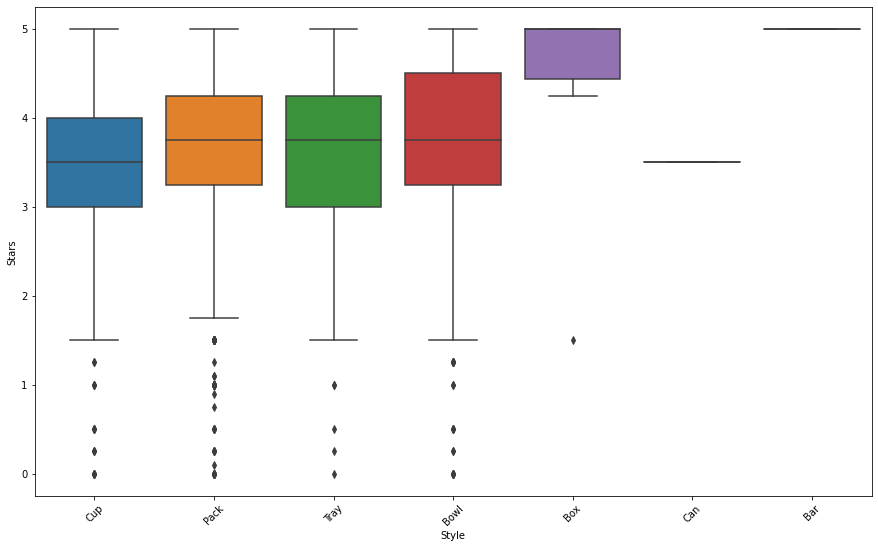

In [100]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.boxplot(x = 'Style', y = 'Stars', data = rated_only)
plt.xticks(rotation = 45)

In [101]:
rated_only.Style.value_counts()

Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [102]:
rated_only.Brand.value_counts()

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
                ... 
Golden Wonder      1
Peyang             1
Sanrio             1
China Best         1
Westbrae           1
Name: Brand, Length: 355, dtype: int64

In [103]:
subset_brand_style = rated_only.Brand.isin(rated_only.Brand.value_counts()[:5].index) & rated_only.Style.isin(rated_only.Style.value_counts()[:4].index)
subset_brand_style

0       False
1       False
2        True
3       False
4       False
        ...  
2575    False
2576    False
2577    False
2578    False
2579    False
Length: 2577, dtype: bool

In [104]:
rated_bradStyle = rated_only[subset_brand_style]
rated_bradStyle.sample(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
244,2336,Nissin,Maxi Sopa Nissin Cuchareable Sabor A Camaron P...,Cup,Mexico,3.00,NaN
525,2055,Nissin,Tokyo Tokunou Gyokai Tonkotsu,Bowl,Japan,5.00,NaN
2545,35,Mama,Chand Clear Soup,Pack,Thailand,3.00,NaN
2192,388,Maruchan,Instant Lunch Cheddar Cheese,Cup,USA,2.75,NaN
2291,289,Paldo,South Korean Broad Noodle,Pack,South Korea,2.00,NaN
253,2327,Nissin,Cup Noodles Spicy Lime Flavor Ramen Noodle Sou...,Cup,USA,4.00,NaN
1402,1178,Nongshim,Shin Black Spicy Pot-au-feu Flavor Premium Noo...,Cup,USA,5.00,NaN
1034,1546,Nissin,Demae Rice Vermicelli Beef Flavour,Pack,Hong Kong,3.50,NaN
2440,140,Mama,Mi Goreng,Pack,Thailand,5.00,NaN
2492,88,Paldo,South Korean Noodle Chicken,Pack,South Korea,3.25,NaN


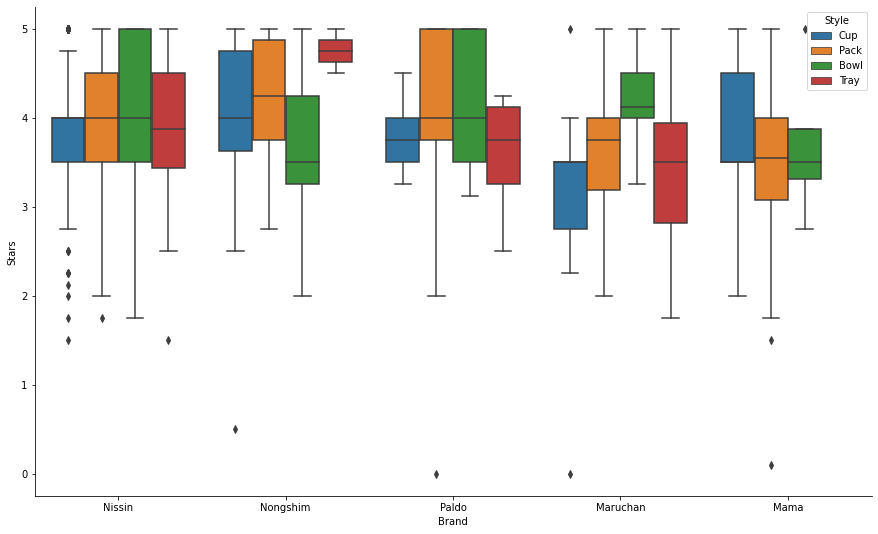

In [105]:
sns.boxplot(x = 'Brand', y = 'Stars', data = rated_bradStyle, hue = 'Style')
sns.despine()

In [106]:
#Cantindad de ramen por estilo 
rated_bradStyle.groupby(['Brand', 'Style']).size()

Brand     Style
Mama      Bowl       4
          Cup       19
          Pack      48
Maruchan  Bowl      17
          Cup       17
          Pack      28
          Tray      14
Nissin    Bowl      71
          Cup      165
          Pack     121
          Tray      24
Nongshim  Bowl      30
          Cup       19
          Pack      47
          Tray       2
Paldo     Bowl      17
          Cup        8
          Pack      36
          Tray       5
dtype: int64